<a href="https://colab.research.google.com/github/geetika-0812/Speech-Emotion-Recognition/blob/main/Speech_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install Ipython
import IPython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 5.3 MB/s 


In [2]:
pip show ipython

Name: ipython
Version: 7.9.0
Summary: IPython: Productive Interactive Computing
Home-page: https://ipython.org
Author: The IPython Development Team
Author-email: ipython-dev@python.org
License: BSD
Location: /usr/local/lib/python3.8/dist-packages
Requires: decorator, prompt-toolkit, pygments, backcall, traitlets, jedi, pickleshare, pexpect, setuptools
Required-by: jupyter-console, ipywidgets, ipython-sql, ipykernel, google-colab, datascience, cufflinks


In [3]:
import IPython

In [4]:
import numpy as np
import pandas as pd 
import os 
import seaborn as sns 
import matplotlib.pyplot as plt 
import librosa 
import librosa.display 
from IPython.display import Audio 
import warnings 
warnings.filterwarnings('ignore')

In [5]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'


In [6]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

 97% 414M/428M [00:03<00:00, 144MB/s]
100% 428M/428M [00:03<00:00, 135MB/s]


In [ ]:
!unzip \*.zip && rm *.zip

In [8]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
print('Dataset is Loaded')


Dataset is Loaded


In [9]:
paths[:5]

['/content/TESS Toronto emotional speech set data/OAF_disgust/OAF_chain_disgust.wav',
 '/content/TESS Toronto emotional speech set data/OAF_disgust/OAF_food_disgust.wav',
 '/content/TESS Toronto emotional speech set data/OAF_disgust/OAF_bath_disgust.wav',
 '/content/TESS Toronto emotional speech set data/OAF_disgust/OAF_nice_disgust.wav',
 '/content/TESS Toronto emotional speech set data/OAF_disgust/OAF_choice_disgust.wav']

In [10]:
labels[:5]

['disgust', 'disgust', 'disgust', 'disgust', 'disgust']

In [11]:
#create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/TESS Toronto emotional speech set dat...,disgust
1,/content/TESS Toronto emotional speech set dat...,disgust
2,/content/TESS Toronto emotional speech set dat...,disgust
3,/content/TESS Toronto emotional speech set dat...,disgust
4,/content/TESS Toronto emotional speech set dat...,disgust


In [12]:
df['label'].value_counts()

disgust    400
sad        400
happy      400
ps         400
fear       400
neutral    400
angry      400
Name: label, dtype: int64

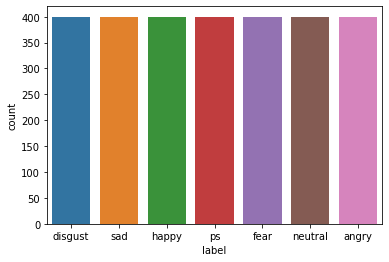

In [13]:
#Exploratory data analysis
sns.countplot(df['label'])

In [14]:
def waveplot(data, sr, emotion) :
  plt.figure(figsize=(10,4))
  plt.title(emotion, size = 20)
  librosa.display.waveplot(data, sr= sr)
  plt.show() 
  
def spectogram(data, sr, emotion) :
  x = librosa.stft(data)
  xdb = librosa.amplitude_to_db(abs(x))
  plt.figure(figsize=(10,4))
  plt.title(emotion, size = 20)
  librosa.display.specshow(xdb, sr=sr, x_axis = 'time', y_axis= 'hz')
  plt.colorbar()
  plt.show() 

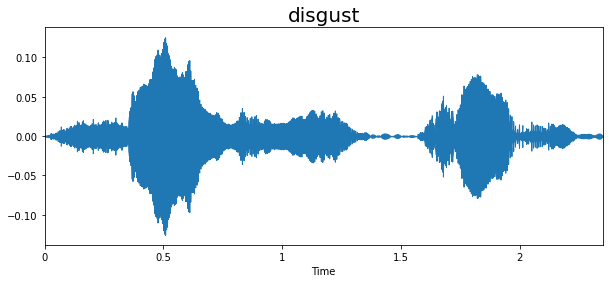

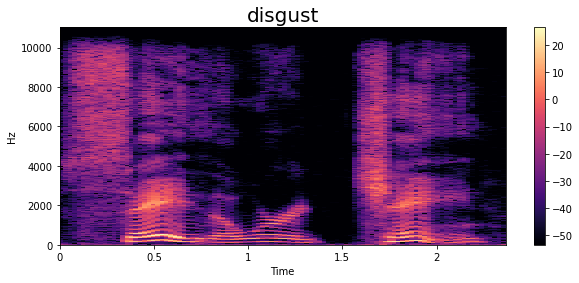

In [15]:
emotion = 'disgust'
path = df['speech'][df['label'] == emotion][0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


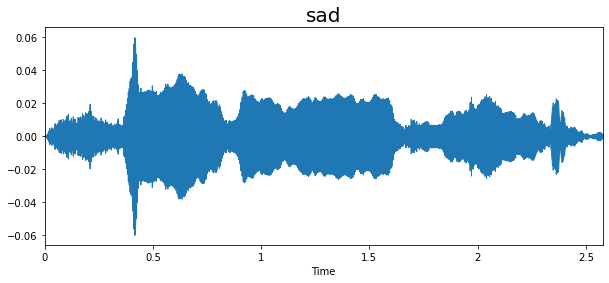

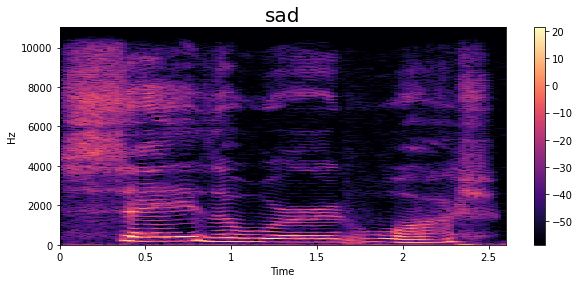

In [16]:
emotion = 'sad'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


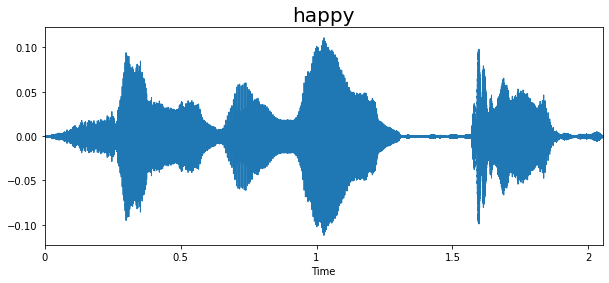

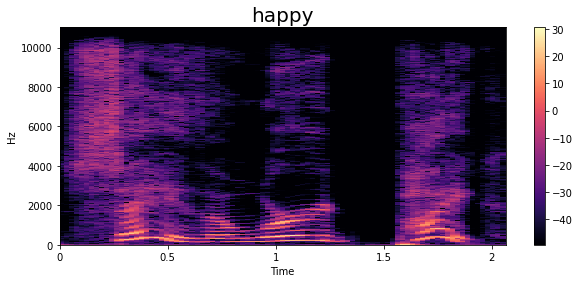

In [17]:
emotion = 'happy'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


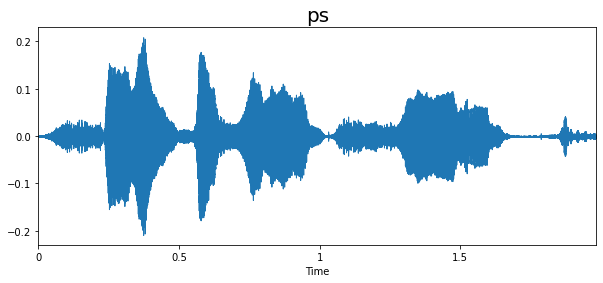

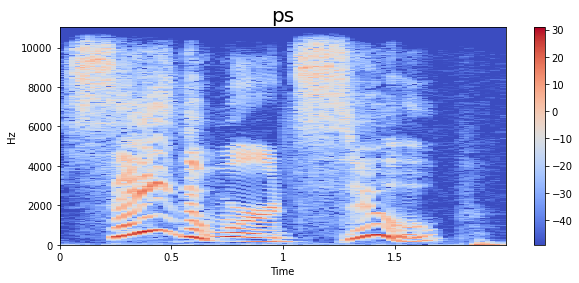

In [18]:
emotion = 'ps'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


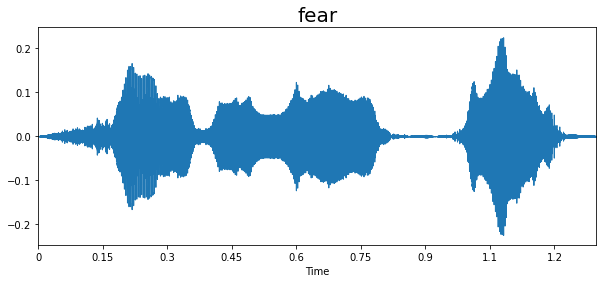

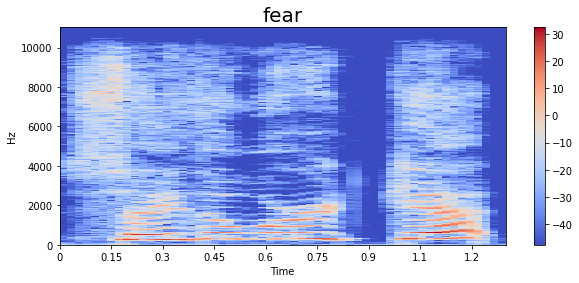

In [19]:
emotion = 'fear'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


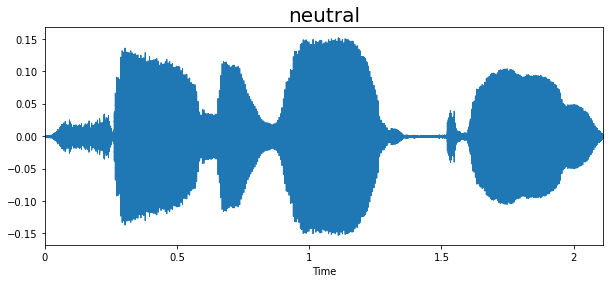

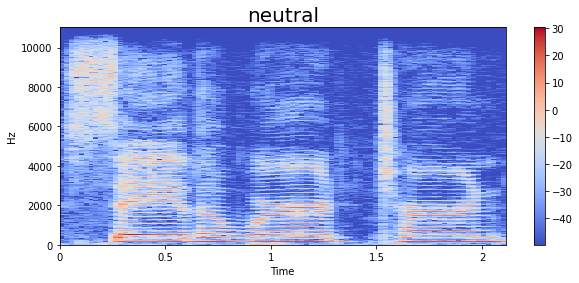

In [20]:
emotion = 'neutral'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


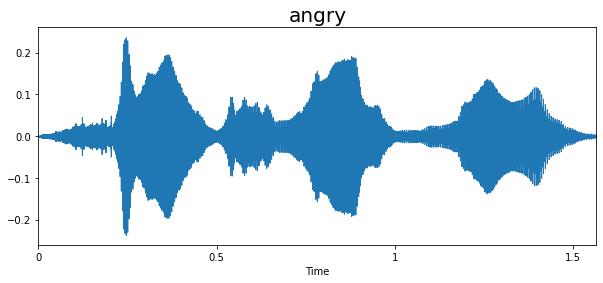

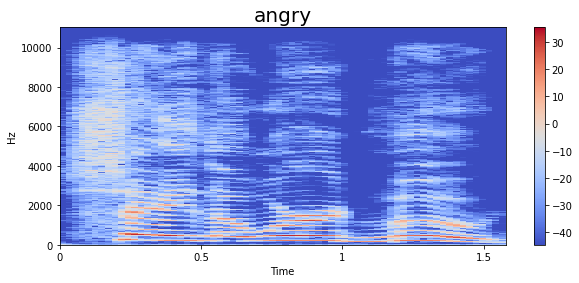

In [21]:
emotion = 'angry'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


In [27]:
def extract_mfcc(filename) :
  y, sr = librosa.load(filename, duration = 3, offset = 0.5)
  mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc = 40).T, axis=0)
  return mfcc

In [28]:
extract_mfcc(df['speech'][0])
#40 values present going to be used as inputs

array([-4.89101746e+02,  8.76908112e+01,  1.69238548e+01,  1.42396593e+01,
        1.96075993e+01,  8.64229798e-01, -1.36998520e+01,  1.08945408e+01,
       -1.92571697e+01, -4.30606174e+00, -1.24102335e+01, -4.65124547e-01,
        3.06366920e-01,  2.04556155e+00, -5.96051455e-01,  3.61030054e+00,
       -6.01147366e+00,  2.47654319e+00, -5.67322397e+00,  3.93906736e+00,
       -4.96571153e-01, -3.71953189e-01, -1.98077488e+00, -4.72163528e-01,
       -4.73545218e+00,  8.33325672e+00, -4.82724094e+00,  4.92493677e+00,
       -1.55427706e+00,  1.74421346e+00,  1.39284527e+00,  1.79930556e+00,
       -4.12549347e-01,  4.07894325e+00,  2.32829142e+00,  7.49415112e+00,
        8.95219231e+00,  9.17605019e+00,  9.13070965e+00,  8.30727959e+00],
      dtype=float32)

In [29]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))


In [30]:
X_mfcc

0       [-489.10175, 87.69081, 16.923855, 14.239659, 1...
1       [-467.1759, 95.51392, 36.623386, -8.41179, 18....
2       [-462.74994, 109.24641, -0.02543814, -11.92019...
3       [-473.3086, 90.064865, 25.57881, 11.860433, 12...
4       [-480.079, 98.55014, 28.461138, 8.965571, 7.91...
                              ...                        
2795    [-378.22403, 81.255424, -0.040650282, 16.80818...
2796    [-333.44806, 71.19331, 3.1917791, 13.629066, -...
2797    [-365.306, 46.391434, -2.5379293, 33.134365, -...
2798    [-331.89767, 25.907827, -1.6873028, 12.618706,...
2799    [-308.95145, 35.085613, -10.238462, 3.6209671,...
Name: speech, Length: 2800, dtype: object

In [31]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [32]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [22]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [23]:
y=y.toarray()

In [24]:
y.shape

(2800, 7)

In [25]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(123, return_sequences=False, input_shape=(40,1)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 123)               61500     
                                                                 
 dense (Dense)               (None, 64)                7936      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 231       
                                                                 
Total params: 71,747
Trainable params: 71,747
Non-traina

In [33]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=100, batch_size=512, shuffle=True)

Epoch 1/100
5/5 [==============================] - 5s 496ms/step - loss: 1.8915 - accuracy: 0.2089 - val_loss: 1.8803 - val_accuracy: 0.2214
Epoch 2/100
5/5 [==============================] - 2s 344ms/step - loss: 1.7679 - accuracy: 0.3161 - val_loss: 1.8612 - val_accuracy: 0.1750
Epoch 3/100
5/5 [==============================] - 2s 345ms/step - loss: 1.6374 - accuracy: 0.4009 - val_loss: 1.7380 - val_accuracy: 0.3821
Epoch 4/100
5/5 [==============================] - 1s 298ms/step - loss: 1.4504 - accuracy: 0.5004 - val_loss: 1.7163 - val_accuracy: 0.4661
Epoch 5/100
5/5 [==============================] - 2s 295ms/step - loss: 1.2045 - accuracy: 0.5580 - val_loss: 1.8315 - val_accuracy: 0.4536
Epoch 6/100
5/5 [==============================] - 1s 299ms/step - loss: 0.9691 - accuracy: 0.6362 - val_loss: 1.8960 - val_accuracy: 0.4339
Epoch 7/100
5/5 [==============================] - 2s 304ms/step - loss: 0.8100 - accuracy: 0.6835 - val_loss: 2.0203 - val_accuracy: 0.4911
Epoch 8/100
5

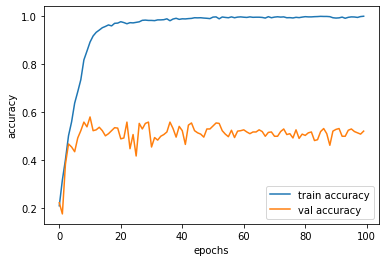

In [34]:
#Train the model
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

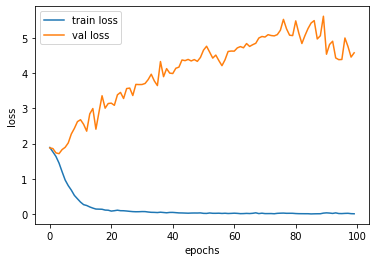

In [35]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()